# Tarea 6. Optimización
Guillermo Segura Gómez

## Ejercicio 1

**1. Programe el método de gradiente conjugado lineal, Algoritmo 1 de la Clase 18, para resolver el sistema de ecuaciones $\mathbf{A}\mathbf{x}=\mathbf{b}$, donde $\mathbf{A}$ es una matriz simétrica y definida positiva.**
   
**Haga que la función devuelva el último punto  $\mathbf{x}_k$, el último residual $\mathbf{r}_k$, el número de iteraciones $k$ y una variable binaria $bres$ que indique si se cumplió el criterio de paro ($bres=True$) o si el algoritmo terminó por iteraciones ($bres=False$).**

In [53]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt

In [54]:
def ConjugateGradient(xk, A, b, nMax, tau):
    rk = A @ xk - b
    pk = -rk
    for k in range(nMax):
        
        # Condición de parada
        if np.linalg.norm(rk) < tau:
            return xk, rk_next, True, k

        Apk = A @ pk # Cálculo de Apk para optimizar

        # Cálculo de alphak
        rkTrk = rk.T @ rk
        alphak = rkTrk / (pk.T @ Apk)
        
        # Siguiente valor de xk
        xk = xk + alphak * pk
        rk_next = rk + alphak * Apk
        
        betak = (rk_next.T @ rk_next) / rkTrk
        pk = -rk_next + betak * pk
        rk = rk_next

    return xk, rk, False, nMax 

2. Pruebe el algoritmo para resolver el sistema de ecuaciones 

$$ \mathbf{A}_1\mathbf{x}=\mathbf{b}_1$$

donde

$$ \mathbf{A}_1 = n\mathbf{I} + \mathbf{1} = 
\left[\begin{array}{llll} n      & 0      & \cdots & 0 \\
                       0      & n      & \cdots & 0 \\ 
                       \vdots & \vdots & \ddots & \vdots \\
                       0      & 0      & \cdots & n \end{array}\right]
+ \left[\begin{array}{llll} 1    & 1      & \cdots & 1 \\
                       1      & 1      & \cdots & 1 \\ 
                       \vdots & \vdots & \ddots & \vdots \\
                       1      & 1      & a\cdots & 1 \end{array}\right],  \qquad
\mathbf{b}_1 = \left[\begin{array}{l} 1 \\ 1 \\ \vdots \\ 1 \end{array}\right], $$

$n$ es la dimensión de la variable independiente
$\mathbf{x}=(x_1, x_2, ..., x_n)$, 
$\mathbf{I}$ es la matriz identidad y $\mathbf{1}$ es la matriz llena de 1's,
ambas de tamaño $n$.

También aplique el algoritmo para resolver el sistema 

$$ \mathbf{A}_2\mathbf{x}=\mathbf{b}_2$$

donde  $\mathbf{A}_2 = [a_{ij}]$ con

$$ a_{ij} = exp\left(-0.25(i-j)^2 \right),  \qquad
\mathbf{b}_2 = \left[\begin{array}{l} 1 \\ 1 \\ \vdots \\ 1 \end{array}\right] $$


- Use $\mathbf{x}_0$ como el vector cero, el máximo número de iteraciones 
  $N=n$ y una toleracia $\tau=\sqrt{n} \epsilon_m^{1/3}$,
  donde $\epsilon_m$ es el épsilon máquina.
- Pruebe el algoritmo resolviendo los dos sistemas de ecuaciones con $n=10, 100, 1000$ y 
  en cada caso imprima la siguiente información

- la dimensión $n$,
- el  número $k$ de iteraciones realizadas,
- las primeras y últimas 4 entradas del punto $\mathbf{x}_k$ que devuelve el algoritmo,
- la norma del residual $\mathbf{r}_k$, 
- la variable $bres$ para saber si el algoritmo puedo converger.

In [55]:
# Función para generar A1 y b1
def generate_A1_b1(n):
    A1 = n * np.eye(n) + np.ones((n, n))
    b1 = np.ones(n)
    return A1, b1

# Función para generar A2 y b2
def generate_A2_b2(n):
    A2 = np.array([[np.exp(-0.25 * (i - j) ** 2) for j in range(n)] for i in range(n)])
    b2 = np.ones(n)
    return A2, b2

# Función para probar el algoritmo con las matrices y vectores dados
def test_algorithm(n):
    epsilon_m = np.finfo(float).eps  # Epsilon máquina
    tau = np.sqrt(n) * (epsilon_m ** (1/3))  # Tolerancia
    x0 = np.zeros(n)  # Vector inicial
    nMax = n  # Número máximo de iteraciones

    # Generar A1, b1 y aplicar el Gradiente Conjugado
    A1, b1 = generate_A1_b1(n)
    xk1, rk1, bres1, k1 = ConjugateGradient(x0, A1, b1, nMax, tau)

    # Generar A2, b2 y aplicar el Gradiente Conjugado
    A2, b2 = generate_A2_b2(n)
    xk2, rk2, bres2, k2 = ConjugateGradient(x0, A2, b2, nMax, tau)

    # Imprimir resultados para A1
    print(f"n={n}, Sistema A1")
    print(f"  Iteraciones: {k1}")
    print(f"  xk (primeras 4 entradas): {xk1[:4]}")
    print(f"  xk (últimas 4 entradas): {xk1[-4:]}")
    print(f"  Norma del residual: {np.linalg.norm(rk1)}")
    print(f"  Convergencia: {bres1}")

    # Imprimir resultados para A2
    print(f"n={n}, Sistema A2")
    print(f"  Iteraciones: {k2}")
    print(f"  xk (primeras 4 entradas): {xk2[:4]}")
    print(f"  xk (últimas 4 entradas): {xk2[-4:]}")
    print(f"  Norma del residual: {np.linalg.norm(rk2)}")
    print(f"  Convergencia: {bres2}")

# Prueba del algoritmo para n=10, 100, 1000
for n in [10, 100, 1000]:
    test_algorithm(n)
    print("\n" + "-"*50 + "\n")

n=10, Sistema A1
  Iteraciones: 1
  xk (primeras 4 entradas): [0.05 0.05 0.05 0.05]
  xk (últimas 4 entradas): [0.05 0.05 0.05 0.05]
  Norma del residual: 0.0
  Convergencia: True
n=10, Sistema A2
  Iteraciones: 5
  xk (primeras 4 entradas): [ 1.36909916 -1.16637682  1.60908281 -0.61339053]
  xk (últimas 4 entradas): [-0.61339053  1.60908281 -1.16637682  1.36909916]
  Norma del residual: 4.381415087263756e-12
  Convergencia: True

--------------------------------------------------

n=100, Sistema A1
  Iteraciones: 1
  xk (primeras 4 entradas): [0.005 0.005 0.005 0.005]
  xk (últimas 4 entradas): [0.005 0.005 0.005 0.005]
  Norma del residual: 0.0
  Convergencia: True
n=100, Sistema A2
  Iteraciones: 100
  xk (primeras 4 entradas): [ 1.44625585 -1.41631711  2.11047274 -1.4249978 ]
  xk (últimas 4 entradas): [-1.42500419  2.11047638 -1.41630417  1.4462564 ]
  Norma del residual: 0.00016847652019634396
  Convergencia: False

--------------------------------------------------



n=1000, Sistema A1
  Iteraciones: 1
  xk (primeras 4 entradas): [0.0005 0.0005 0.0005 0.0005]
  xk (últimas 4 entradas): [0.0005 0.0005 0.0005 0.0005]
  Norma del residual: 0.0
  Convergencia: True
n=1000, Sistema A2
  Iteraciones: 262
  xk (primeras 4 entradas): [ 1.44628824 -1.41635954  2.1105181  -1.42507231]
  xk (últimas 4 entradas): [-1.42507231  2.1105181  -1.41635954  1.44628824]
  Norma del residual: 0.00018766135470172154
  Convergencia: True

--------------------------------------------------



Podemos observar que para el sistema $\mathbf{A}_1\mathbf{x}=\mathbf{b}_1$, el algoritmo converge rápidamente (en 1 iteración) para todos los valores de $n$ probados. Esto se puede explicar con la simplicidad y estructura de la matriz $\mathbf{A}_1$.

Por otro lado, el sistema $\mathbf{A}_2\mathbf{x}=\mathbf{b}_2$ presenta un mayor desafío, especialmente para $n=100$ donde no se logró la convergencia dentro del número máximo de iteraciones. Sin embargo, para $n=1000$, el algoritmo pudo converger, pero necesitó un mayor número de iteraciones (262), lo que indica la complejidad creciente del sistema con el aumento de $n$.

## Ejercicio 2

**Programar el método de gradiente conjugado no lineal descrito en el Algoritmo 3  de Clase 19 usando la fórmula de Fletcher-Reeves:**

$$ \beta_{k+1} = \frac{\nabla f_{k+1}^\top \nabla f_{k+1}}{\nabla f_{k}^\top\nabla f_{k}}  $$ 

1. Escriba la función que implemente el algoritmo. 

- La función debe recibir como argumentos $\mathbf{x}_0$, la función $f$ y 
  su gradiente, el número máximo de iteraciones $N$, la tolerancia $\tau$, y los
  parámetros para el algoritmo de backtracking: factor $\rho$, la constante $c_1$
  para la condición de descenso suficiente, la constante $c_2$ para la condición
  de curvatura, y el máximo número de iteraciones $N_b$.
- Agregue al algoritmo un contador
  $nr$ que se incremente cada vez que se aplique el reinicio, es decir, cuando
  se hace $\beta_{k+1}=0$.
   
- Para calcular el tamaño de paso $\alpha_k$ use el algoritmo de backtracking
  usando las condiciones de Wolfe con el valor inicial $\alpha_{ini}=1$.

- Haga que la función devuelva el último punto  $\mathbf{x}_k$, 
  el último gradiente $\mathbf{g}_k$, el número de iteraciones $k$ 
  y una variable binaria $bres$ que indique si se cumplio el criterio
  de paro ($bres=True$) o si el algoritmo terminó por
  iteraciones ($bres=False$), y el contador $bres$.

In [56]:
def backtracking_wolfe(xk, pk, gk, f, gradf, alpha_0, rho, c1, c2, nMax):
    alpha = alpha_0
    for i in range(nMax):
        x_next = xk + alpha * pk
        f_next = f(x_next)
        f_curr = f(xk)
        gk_next = gradf(x_next)
        
        # Condición de descenso suficiente
        if f_next > f_curr + c1 * alpha * np.dot(gk, pk):
            alpha *= rho
        # Condición de curvatura
        elif np.dot(gk_next, pk) < c2 * np.dot(gk, pk):
            alpha *= rho
        else:
            return alpha
    return alpha

In [57]:
def ConjugateGrad_NLineal_FR(x0, f, gradf, nMax, tau, alpha_0, rho, c1, c2, nBack):
    xk = np.array(x0)
    gk = gradf(xk)
    dk = -gk
    nr = 0  # Contador de reinicios
    sequence = []

    for k in range(nMax):
        if np.linalg.norm(gk) < tau:
            return xk, gk, k, True, sequence, nr
        
        alpha_k = backtracking_wolfe(xk, dk, gk, f, gradf, alpha_0, rho, c1, c2, nBack)
        xk += alpha_k * dk
        gk_next = gradf(xk)
        
        # Condición para el reinicio (revisar ortogonalidad)
        if abs(gk_next.T @ gk) < (0.2 * np.linalg.norm(gk_next)**2):
            betak = (gk_next.T @ gk_next) / (gk.T @ gk)
        else:
            betak = 0
            nr += 1
        
        dk = -gk_next + betak * dk
        gk = gk_next
        
        # Almacenar puntos solo para visualización en 2D
        if len(x0) == 2:
            sequence.append(xk.tolist())

    return xk, gk, k, False, sequence, nr  # No se alcanzó la convergencia dentro de nMax

2. Pruebe el algoritmo usando la siguientes funciones con los puntos iniciales dados:


**Función de cuadrática 1:** Para $\mathbf{x}=(x_1,x_2, ..., x_n)$

- $f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^\top\mathbf{A}_1\mathbf{x} - \mathbf{b}_1^\top\mathbf{x}$,
  donde $\mathbf{A}_1$ y $\mathbf{b}_1$ están definidas como en el Ejercicio 1.
- $\mathbf{x}_0 = (0,...,0)\in \mathbb{R}^{10}$ 
- $\mathbf{x}_0 = (0,...,0)\in \mathbb{R}^{100}$ 
- $\mathbf{x}_0 = (0,...,0)\in \mathbb{R}^{1000}$ 

**Función de cuadrática 2:** Para $\mathbf{x}=(x_1,x_2, ..., x_n)$

- $f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^\top\mathbf{A}_2\mathbf{x} - \mathbf{b}_2^\top\mathbf{x}$,
  donde $\mathbf{A}_2$ y $\mathbf{b}_2$ están definidas como en el Ejercicio 1.
- $\mathbf{x}_0 = (0,...,0)\in \mathbb{R}^{10}$ 
- $\mathbf{x}_0 = (0,...,0)\in \mathbb{R}^{100}$ 
- $\mathbf{x}_0 = (0,...,0)\in \mathbb{R}^{1000}$ 

**Función de Beale :** Para $\mathbf{x}=(x_1,x_2)$

$$f(\mathbf{x}) = (1.5-x_1 + x_1x_2)^2 + (2.25 - x_1 + x_1x_2^2)^2 + (2.625 - x_1 + x_1x_2^3)^2.$$
- $\mathbf{x}_0 = (2,3)$  
   

**Función de Himmelblau:** Para $\mathbf{x}=(x_1,x_2)$

$$f(\mathbf{x}) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2. $$
- $\mathbf{x}_0 = (2,4)$



**Función de Rosenbrock:** Para $\mathbf{x}=(x_1,x_2, ..., x_n)$

$$ f(\mathbf{x}) = \sum_{i=1}^{n-1} \left[100(x_{i+1} - x_i^2)^2 + (1-x_i)^2 \right]
\quad n\geq 2.$$
- $\mathbf{x}_0 = (-1.2, 1.0)\in \mathbb{R}^{2}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{20}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{40}$ 


3. Fije $N=5000$, $\tau = \sqrt{n}\epsilon_m^{1/3}$, donde $n$ es la dimensión
   de la variable $\mathbf{x}$ y $\epsilon_m$ es el épsilon máquina. 
   Para backtracking use $\rho=0.5$, $c_1=0.001$, $c_2=0.01$, $N_b=500$.
   
4. Para cada función de prueba imprima
   
- la dimensión $n$,
- $f(\mathbf{x}_0)$,
- el  número $k$ de iteraciones realizadas,
- $f(\mathbf{x}_k)$,
- las primeras y últimas 4 entradas del punto $\mathbf{x}_k$ que devuelve el algoritmo,
- la norma del vector gradiente $\mathbf{g}_k$, 
- la variable $bres$ para saber si el algoritmo puedo converger.
- el número de reinicios $nr$.

--- 

Definimos primero una función general de la forma

$$f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^\top\mathbf{A}_1\mathbf{x} - \mathbf{b}_1^\top\mathbf{x}$$

y su gradiente

$$
\nabla f(\mathbf{x}) = \mathbf{A}_1 \mathbf{x} - \mathbf{b}_1
$$

In [58]:
def fG(x, A, b):
    return 0.5 * np.dot(x.T, np.dot(A, x)) - np.dot(b.T, x)

def gradfG(x, A, b):
    return np.dot(A, x) - b

Además definimos las otras funciones a probar

In [59]:
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def grad_himmelblau(x):
    df_dx1 = 4 * x[0] * (x[0]**2 + x[1] - 11) + 2 * (x[0] + x[1]**2 - 7)
    df_dx2 = 2 * (x[0]**2 + x[1] - 11) + 4 * x[1] * (x[0] + x[1]**2 - 7)
    return np.array([df_dx1, df_dx2])

In [60]:
def beale(x):
    return ((1.5 - x[0] + x[0]*x[1])**2 + 
            (2.25 - x[0] + x[0]*x[1]**2)**2 + 
            (2.625 - x[0] + x[0]*x[1]**3)**2)

def grad_beale(x):
    x1, x2 = x
    df_dx1 = 2*(1.5 - x1 + x1*x2)*(-1 + x2) + 2*(2.25 - x1 + x1*x2**2)*(-1 + x2**2) + 2*(2.625 - x1 + x1*x2**3)*(-1 + x2**3)
    df_dx2 = 2*(1.5 - x1 + x1*x2)*x1 + 2*(2.25 - x1 + x1*x2**2)*2*x1*x2 + 2*(2.625 - x1 + x1*x2**3)*3*x1*x2**2
    return np.array([df_dx1, df_dx2])

In [61]:
def rosenbrock(x):
    return sum(100*(x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

def grad_rosenbrock(x):
    df_dx = np.zeros_like(x)
    n = len(x)
    df_dx[:-1] += -400 * x[:-1] * (x[1:] - x[:-1]**2) + 2 * (x[:-1] - 1)  # Derivadas parciales para x_i donde i < n
    df_dx[1:] += 200 * (x[1:] - x[:-1]**2)  # Derivadas parciales para x_{i+1} donde i < n
    return df_dx

In [62]:
# Función para visualizar los contornos de nivel de función en 2D
def contornosFnc2D(fncf, xleft, xright, ybottom, ytop, levels, secuencia=None):
    ax = np.linspace(xleft, xright, 250)
    ay = np.linspace(ybottom, ytop, 200)
    mX, mY = np.meshgrid(ax, ay)
    mZ = np.array([[fncf(np.array([x, y])) for x in ax] for y in ay])

    fig, ax = plt.subplots()
    CS = ax.contour(mX, mY, mZ, levels, cmap='viridis')
    plt.colorbar(CS, ax=ax)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

    # Graficar la secuencia de puntos
    if secuencia is not None:
        secuencia = np.array(secuencia)
        ax.plot(secuencia[:, 0], secuencia[:, 1], 'r.-')  # 'r.-' para puntos rojos conectados por líneas
        ax.plot(secuencia[0, 0], secuencia[0, 1], 'go')  # Punto de inicio en verde
        ax.plot(secuencia[-1, 0], secuencia[-1, 1], 'bo')  # Punto final en azul

    plt.show()

Primero probamos las funciones cuadráticas.

In [63]:
# Epsilon de la máquina
epsilon_m = np.finfo(float).eps

# Configuración de tolerancia
tau = lambda n: np.sqrt(n) * epsilon_m**(1/3)

# Parámetros iniciales
alpha_0 = 1
rho = 0.5
c1 = 0.001
c2 = 0.01

# Número máximo de iteraciones para el descenso máximo y la sección dorada
NMax = 5000
NBack = 600

# Función para probar el algoritmo de descenso máximo con diferentes funciones
def probar_descenso_maximo(func, grad_func, puntos_iniciales):
    for x0 in puntos_iniciales:
        xk, gk, k, convergio, secuencia, nr = ConjugateGrad_NLineal_FR(x0, func, grad_func, NMax, tau(len(x0)), alpha_0, rho, c1, c2, NBack)
        valor_final = func(xk)
        print(f"Resultado para x0 = {x0}, f(x0) = {func(x0)}:")
        print(f"xk = {xk}, k = {k}, f(xk) = {valor_final}, convergió: {convergio}")
        print(f"Numero de reinicios = {nr}")
        if len(x0) == 2 and secuencia:
            print(f"Secuencia de puntos: {secuencia[:2]}")
            contornosFnc2D(func, xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5, levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400], secuencia=secuencia)
        print()


# Función para probar las funciones cuadráticas
def test_quadratic(n, generate):

    # Puntos iniciales
    x0 = [np.zeros(n)]

    # Generar A, b
    A, b = generate(n)

    # Generamos la función y su gradiente 
    f = lambda x: fG(x, A, b)
    gradf = lambda x: gradfG(x, A, b)
    
    probar_descenso_maximo(f, gradf, x0)

Probamos el sistema cuadrático 1

In [64]:
# Prueba del algoritmo para f1
for n in [10, 100, 1000]:
    test_quadratic(n, generate_A1_b1)

Resultado para x0 = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], f(x0) = 0.0:
xk = [0.05000019 0.05000019 0.05000019 0.05000019 0.05000019 0.05000019
 0.05000019 0.05000019 0.05000019 0.05000019], k = 9, f(xk) = -0.24999999999636202, convergió: True
Numero de reinicios = 9

Resultado para x0 = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.], f(x0) = 0.0:
xk = [0.00500003 0.00500003 0.00500003 0.00500003 0.00500003 0.00500003
 0.00500003 0.00500003 0.00500003 0.00500003 0.00500003 0.00500003
 0.00500003 0.00500003 0.00500003 0.00500003 0.00500003 0.00500003
 0.00500003 0.00500003 0.00500003 0.00500003 0.00500003 0.00500003
 0.00500003 0.00500003 0.00500003 0.00500003 0.00500003 0.00500003
 0.00500003 0.00500003 0.00500003 0.00500003 0.00500003 0

Resultado para x0 = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

Ahora probamos el sistema cuadrático 2

In [65]:
# Prueba del algoritmo para f2
for n in [10, 100, 1000]:
    test_quadratic(n, generate_A2_b2)

Resultado para x0 = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], f(x0) = 0.0:
xk = [ 1.36889566 -1.16586292  1.60838905 -0.61279115  0.59477256  0.59477256
 -0.61279115  1.60838905 -1.16586292  1.36889566], k = 1571, f(xk) = -1.7934207913526616, convergió: True
Numero de reinicios = 1230

Resultado para x0 = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.], f(x0) = 0.0:
xk = [ 1.44208203 -1.40322734  2.08547332 -1.38700249  1.70857605 -0.88010361
  1.19995174 -0.4267088   0.81965292 -0.11887528  0.57624854  0.07023695
  0.43154584  0.17931479  0.35064981  0.23821152  0.30871104  0.26728273
  0.28924189  0.27974891  0.28175778  0.28381533  0.27994207  0.28424583
  0.28029303  0.28353226  0.2811104   0.28277043  0.28174497  0.2822931
  0.28207596 

Ahora probamos las funciones de optimización ya que son funciones con resultados conocidos, las cuales podemos probar mas sencillamente que las primeras funciones.

Función de Himmelblau:
Resultado para x0 = [2. 4.], f(x0) = 130.0:
xk = [ 3.58442828 -1.84812653], k = 37, f(xk) = 2.0568411381419677e-13, convergió: True
Numero de reinicios = 36
Secuencia de puntos: [[2.0625, -1.3125], [4.352530823584874, -2.3135086765892776], [2.7361810201222534, -2.0983715861462016], [3.691488135866293, -1.9047316676403367], [3.5148442032531855, -1.8892711759672667], [3.6297719387433336, -1.8626069243853784], [3.5557506438173756, -1.8608430580474333], [3.603504541795902, -1.8518966454653996], [3.5724399041293884, -1.8522412664073833], [3.592414590133752, -1.8490566389382543]]


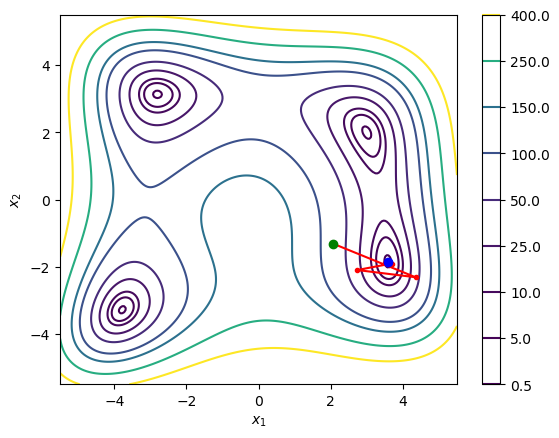


Función de Beale:
Resultado para x0 = [2. 3.], f(x0) = 3347.203125:
xk = [2.99998551 0.49999649], k = 78, f(xk) = 3.377431057983643e-11, convergió: True
Numero de reinicios = 65
Secuencia de puntos: [[-1.08056640625, -3.21044921875], [1.7385279788790102, -0.5167037007758362], [1.6702182133704837, 0.19049842256335625], [2.0943612184475393, -0.01708745755063787], [2.1058410909975263, 0.3154047253054244], [2.221501652846917, 0.1953473151416435], [2.368756293476698, 0.41215856611692714], [2.3687562934766984, 0.41215856611692736], [2.455157970829864, 0.2473934610771858], [2.441484913115475, 0.350791885259172]]


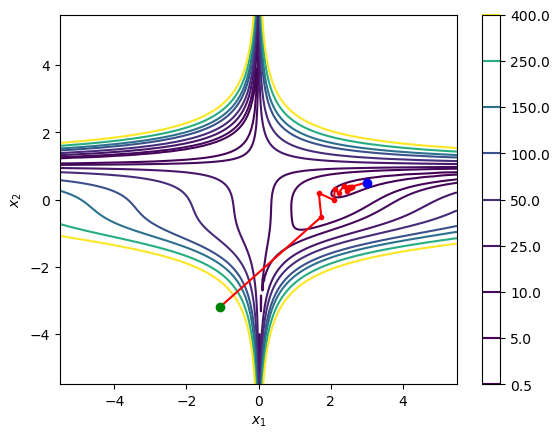


Función de Rosenbrock:
Resultado para x0 = [-1.2  1. ], f(x0) = 24.199999999999996:
xk = [1.00002802 1.0000563 ], k = 4999, f(xk) = 7.91905382065622e-10, convergió: False
Numero de reinicios = 4248
Secuencia de puntos: [[-0.9894531249999999, 1.0859375], [-1.0643320904579014, 1.0441718697547913], [-1.0234514645128605, 1.0614825980797318], [-1.0267651031888638, 1.0560022473507424], [-1.0202563808475194, 1.0553164386693736], [-1.0238373428835006, 1.0496940339782426], [-1.0170924472957374, 1.0491271865971896], [-1.0208542322682348, 1.0434044755615814], [-1.0139660606926788, 1.0429118536781383], [-1.0178108535804755, 1.037136587490049]]


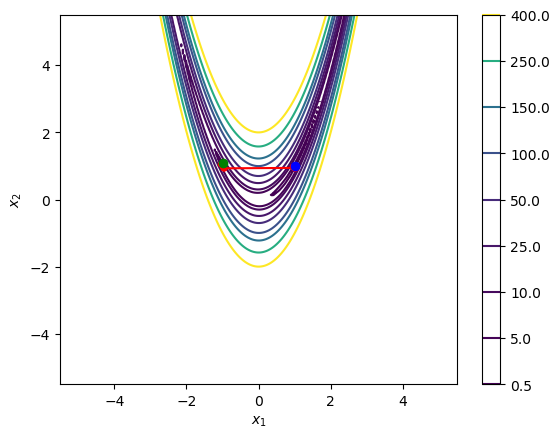


Resultado para x0 = [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.
 -1.2  1.  -1.2  1.  -1.2  1. ], f(x0) = 4597.999999999999:
xk = [1.         1.         1.         1.         1.         1.
 1.         1.         1.00000001 1.00000002 1.00000006 1.00000012
 1.00000024 1.00000047 1.00000094 1.00000187 1.00000375 1.00000751
 1.00001505 1.00003017], k = 848, f(xk) = 3.0231817062524976e-10, convergió: True
Numero de reinicios = 713

Resultado para x0 = [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.
 -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.
 -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1. ], f(x0) = 9680.0:
xk = [1.         1.         1.00000001 1.         1.00000001 1.
 1.00000001 1.00000001 1.         1.00000001 1.         1.00000001
 1.00000001 1.00000001 1.00000001 1.         1.00000001 1.00000001
 1.00000001 1.00000001 1.00000001 1.00000001 1.00000001 1.00000001
 1.         1.00000001 1.         1.  

In [66]:
# Puntos iniciales para la función de Himmelblau
puntos_iniciales_himmelblau = [np.array([2.0, 4.0])]

# Puntos iniciales para la función de Beale
puntos_iniciales_beale = [np.array([2.0, 3.0])]

# Puntos iniciales para la función de Rosenbrock
puntos_iniciales_rosenbrock = [
    np.array([-1.2, 1.0]),
    np.array([-1.2 if i % 2 == 0 else 1.0 for i in range(20)]), # Usamos una list comprenhension
    np.array([-1.2 if i % 2 == 0 else 1.0 for i in range(40)])
]
# Epsilon de la máquina
epsilon_m = np.finfo(float).eps

# Configuración de tolerancia
tau = lambda n: np.sqrt(n) * epsilon_m**(1/3)

# Parámetros iniciales
alpha_0 = 1
rho = 0.5
c1 = 0.001
c2 = 0.01

# Número máximo de iteraciones para el descenso máximo y la sección dorada
NMax = 5000
NBack = 500

# Función para probar el algoritmo de descenso máximo con diferentes funciones
def probar_descenso_maximo(func, grad_func, puntos_iniciales):
    for x0 in puntos_iniciales:
        xk, gk, k, convergio, secuencia, nr = ConjugateGrad_NLineal_FR(x0, func, grad_func, NMax, tau(len(x0)), alpha_0, rho, c1, c2, NBack)
        valor_final = func(xk)
        print(f"Resultado para x0 = {x0}, f(x0) = {func(x0)}:")
        print(f"xk = {xk}, k = {k}, f(xk) = {valor_final}, convergió: {convergio}")
        print(f"Numero de reinicios = {nr}")
        if len(x0) == 2 and secuencia:
            print(f"Secuencia de puntos: {secuencia[:10]}")
            contornosFnc2D(func, xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5, levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400], secuencia=secuencia)
        print()

# Probar con la función de Himmelblau
print("Función de Himmelblau:")
probar_descenso_maximo(himmelblau, grad_himmelblau, puntos_iniciales_himmelblau)

# Probar con la función de Beale
print("Función de Beale:")
probar_descenso_maximo(beale, grad_beale, puntos_iniciales_beale)

# Probar con la función de Rosenbrock
print("Función de Rosenbrock:")
probar_descenso_maximo(rosenbrock, grad_rosenbrock, puntos_iniciales_rosenbrock)


## Ejercicio 3 

Programar el método de gradiente conjugado no lineal de usando la fórmula de
Hestenes-Stiefel:

En este caso el algoritmo es igual al del Ejercicio 2, con excepción del cálculo de $\beta_{k+1}$. Primero se calcula el vector $\mathbf{y}_k$ y luego $\beta_{k+1}$:

$$ \mathbf{y}_k =  \nabla f_{k+1}-\nabla f_{k} $$
$$ \beta_{k+1} =   \frac{\nabla f_{k+1}^\top\mathbf{y}_k }{p_{k}^\top\mathbf{y}_k}  $$

1. Repita el Ejercicio 2 usando la fórmula de Hestenes-Stiefel.
2. ¿Hay alguna diferencia que indique que es mejor usar la fórmula de Hestenes-Stiefel
   respesto a Fletcher-Reeves?
3. La cantidad de reinicios puede indicar que tanto se comporta el algoritmo
   como el algoritmo de descenso máximo. Agregue un comentario sobre esto 
   de acuerdo a los resultados obtenidos para cada fórmula.

In [67]:
def ConjugateGrad_NLineal_HS(x0, f, gradf, nMax, tau, alpha_0, rho, c1, c2, nBack):
    xk = np.array(x0)
    gk = gradf(xk)
    dk = -gk
    nr = 0  # Contador de reinicios
    sequence = []

    for k in range(nMax):
        if np.linalg.norm(gk) < tau:
            return xk, gk, k, True, sequence, nr
        
        alpha_k = backtracking_wolfe(xk, dk, gk, f, gradf, alpha_0, rho, c1, c2, nBack)
        xk += alpha_k * dk
        gk_next = gradf(xk)
        yk = gk_next - gk
        
        # Condición para el reinicio (revisar ortogonalidad)
        if abs(gk_next.T @ gk) < (0.2 * np.linalg.norm(gk_next)**2):
            betak = (gk_next.T @ yk) / (dk.T @ yk)
        else:
            betak = 0
            nr += 1
        
        dk = -gk_next + betak * dk
        gk = gk_next
        
        # Almacenar puntos solo para visualización en 2D
        if len(x0) == 2:
            sequence.append(xk.tolist())

    return xk, gk, k, False, sequence, nr  # No se alcanzó la convergencia dentro de nMax

In [68]:
# Epsilon de la máquina
epsilon_m = np.finfo(float).eps

# Configuración de tolerancia
tau = lambda n: np.sqrt(n) * epsilon_m**(1/3)

# Parámetros iniciales
alpha_0 = 1
rho = 0.5
c1 = 0.001
c2 = 0.01

# Número máximo de iteraciones para el descenso máximo y la sección dorada
NMax = 5000
NBack = 600

# Función para probar el algoritmo de descenso máximo con diferentes funciones
def probar_descenso_maximo(func, grad_func, puntos_iniciales):
    for x0 in puntos_iniciales:
        xk, gk, k, convergio, secuencia, nr = ConjugateGrad_NLineal_HS(x0, func, grad_func, NMax, tau(len(x0)), alpha_0, rho, c1, c2, NBack)
        valor_final = func(xk)
        print(f"Resultado para x0 = {x0}, f(x0) = {func(x0)}:")
        print(f"xk = {xk}, k = {k}, f(xk) = {valor_final}, convergió: {convergio}")
        print(f"Numero de reinicios = {nr}")
        if len(x0) == 2 and secuencia:
            print(f"Secuencia de puntos: {secuencia[:2]}")
            contornosFnc2D(func, xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5, levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400], secuencia=secuencia)
        print()


# Función para probar las funciones cuadráticas
def test_quadratic(n, generate):

    # Puntos iniciales
    x0 = [np.zeros(n)]

    # Generar A, b
    A, b = generate(n)

    # Generamos la función y su gradiente 
    f = lambda x: fG(x, A, b)
    gradf = lambda x: gradfG(x, A, b)
    
    probar_descenso_maximo(f, gradf, x0)

Probamos el sistema cuadrático 1

In [69]:
# Prueba del algoritmo para f1
for n in [10, 100, 1000]:
    test_quadratic(n, generate_A1_b1)

Resultado para x0 = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], f(x0) = 0.0:
xk = [0.05000019 0.05000019 0.05000019 0.05000019 0.05000019 0.05000019
 0.05000019 0.05000019 0.05000019 0.05000019], k = 9, f(xk) = -0.24999999999636202, convergió: True
Numero de reinicios = 9

Resultado para x0 = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.], f(x0) = 0.0:
xk = [0.00500003 0.00500003 0.00500003 0.00500003 0.00500003 0.00500003
 0.00500003 0.00500003 0.00500003 0.00500003 0.00500003 0.00500003
 0.00500003 0.00500003 0.00500003 0.00500003 0.00500003 0.00500003
 0.00500003 0.00500003 0.00500003 0.00500003 0.00500003 0.00500003
 0.00500003 0.00500003 0.00500003 0.00500003 0.00500003 0.00500003
 0.00500003 0.00500003 0.00500003 0.00500003 0.00500003 0

Ahora probamos el sistema cuadrático 2

In [70]:
# Prueba del algoritmo para f2
for n in [10, 100, 1000]:
    test_quadratic(n, generate_A2_b2)

Resultado para x0 = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], f(x0) = 0.0:
xk = [ 1.36889566 -1.16586292  1.60838905 -0.61279115  0.59477256  0.59477256
 -0.61279115  1.60838905 -1.16586292  1.36889566], k = 1571, f(xk) = -1.7934207913526616, convergió: True
Numero de reinicios = 1230

Resultado para x0 = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.], f(x0) = 0.0:
xk = [ 1.43574711 -1.38364255  2.04861357 -1.33199051  1.6369175  -0.79482407
  1.10497892 -0.32632041  0.71812681 -0.02010894  0.48358338  0.15425045
  0.35794489  0.24162001  0.29980583  0.27812842  0.27874551  0.28866183
  0.27497598  0.2884652   0.27718391  0.28555298  0.28002646  0.2831932
  0.28176663  0.28206419  0.28239521  0.28180845  0.28241789  0.28191567
  0.282268   

Ahora probamos las funciones de optimización ya que son funciones con resultados conocidos, las cuales podemos probar mas sencillamente que las primeras funciones.

Función de Himmelblau:
Resultado para x0 = [2. 4.], f(x0) = 130.0:
xk = [ 3.58442828 -1.84812653], k = 37, f(xk) = 1.9833788488942771e-13, convergió: True
Numero de reinicios = 36
Secuencia de puntos: [[2.0625, -1.3125], [4.352040631804772, -2.2718423752806016], [2.7316763914402022, -2.092115318716974], [3.6895006993627346, -1.901972735280989], [3.5160832468629137, -1.8876798499225802], [3.6289374002205363, -1.8619088588467099], [3.5562553448995438, -1.8603814971565862], [3.6031536062903706, -1.851703236713325], [3.5726512294353294, -1.852098781102387], [3.592268022399545, -1.8490024562341307]]


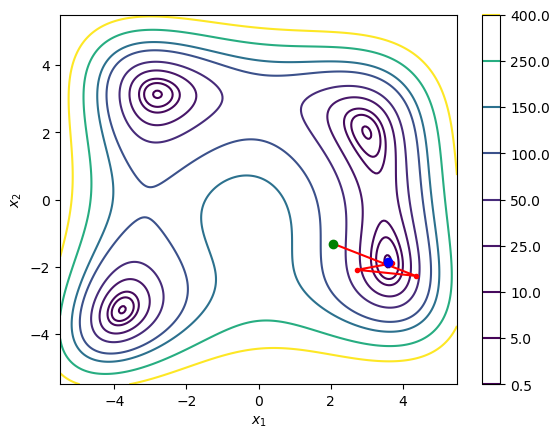


Función de Beale:
Resultado para x0 = [2. 3.], f(x0) = 3347.203125:
xk = [3.00001871 0.50000457], k = 769, f(xk) = 5.6113870648033834e-11, convergió: True
Numero de reinicios = 585
Secuencia de puntos: [[-1.08056640625, -3.21044921875], [1.7385279788790102, -0.5167037007758362], [1.6702182133704837, 0.19049842256335625], [2.0943612184475393, -0.01708745755063787], [2.1058410909975263, 0.3154047253054244], [2.221501652846917, 0.1953473151416435], [2.368756293476698, 0.41215856611692714], [3.306169099847903, 0.6244473928653774], [3.3165718403513047, 0.552716772759076], [3.3122277949273204, 0.5696126507670698]]


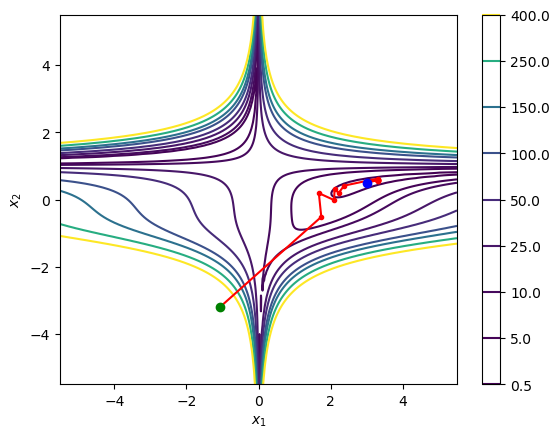


Función de Rosenbrock:
Resultado para x0 = [-1.2  1. ], f(x0) = 24.199999999999996:
xk = [0.999996   0.99999198], k = 1382, f(xk) = 1.606990894968612e-11, convergió: True
Numero de reinicios = 1128
Secuencia de puntos: [[-0.9894531249999999, 1.0859375], [-1.0643320904579014, 1.0441718697547913], [-1.0234514645128605, 1.0614825980797318], [-1.0267651031888638, 1.0560022473507424], [-1.0202563808475194, 1.0553164386693736], [-1.0238373428835006, 1.0496940339782426], [-1.0170924472957374, 1.0491271865971896], [-1.0208542322682348, 1.0434044755615814], [-1.0139660606926788, 1.0429118536781383], [-1.0178108535804755, 1.037136587490049]]


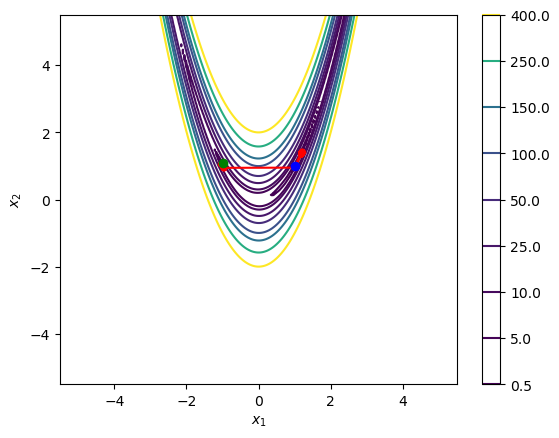


Resultado para x0 = [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.
 -1.2  1.  -1.2  1.  -1.2  1. ], f(x0) = 4597.999999999999:
xk = [1.         1.         1.00000001 0.99999999 1.00000001 1.
 1.         1.         0.99999999 1.         0.99999998 0.99999997
 0.99999994 0.99999988 0.99999976 0.9999995  0.99999901 0.99999801
 0.99999603 0.99999203], k = 1625, f(xk) = 2.1261571738072738e-11, convergió: True
Numero de reinicios = 1269

Resultado para x0 = [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.
 -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.
 -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1. ], f(x0) = 9680.0:
xk = [0.99999008 1.00002593 0.99996035 1.00005603 0.99993217 1.00008395
 0.99990635 1.00010857 0.99988387 1.00012908 0.99986566 1.00014484
 0.99985238 1.00015537 0.99984409 1.00015999 0.99983868 1.00015631
 0.9998303  1.00014263 0.99981884 1.00013615 0.99983044 1.00018888
 0.99991218 1.00033103 1.000

In [71]:
# Puntos iniciales para la función de Himmelblau
puntos_iniciales_himmelblau = [np.array([2.0, 4.0])]

# Puntos iniciales para la función de Beale
puntos_iniciales_beale = [np.array([2.0, 3.0])]

# Puntos iniciales para la función de Rosenbrock
puntos_iniciales_rosenbrock = [
    np.array([-1.2, 1.0]),
    np.array([-1.2 if i % 2 == 0 else 1.0 for i in range(20)]), # Usamos una list comprenhension
    np.array([-1.2 if i % 2 == 0 else 1.0 for i in range(40)])
]
# Epsilon de la máquina
epsilon_m = np.finfo(float).eps

# Configuración de tolerancia
tau = lambda n: np.sqrt(n) * epsilon_m**(1/3)

# Parámetros iniciales
alpha_0 = 1
rho = 0.5
c1 = 0.001
c2 = 0.01

# Número máximo de iteraciones para el descenso máximo y la sección dorada
NMax = 5000
NBack = 500

# Función para probar el algoritmo de descenso máximo con diferentes funciones
def probar_descenso_maximo(func, grad_func, puntos_iniciales):
    for x0 in puntos_iniciales:
        xk, gk, k, convergio, secuencia, nr = ConjugateGrad_NLineal_HS(x0, func, grad_func, NMax, tau(len(x0)), alpha_0, rho, c1, c2, NBack)
        valor_final = func(xk)
        print(f"Resultado para x0 = {x0}, f(x0) = {func(x0)}:")
        print(f"xk = {xk}, k = {k}, f(xk) = {valor_final}, convergió: {convergio}")
        print(f"Numero de reinicios = {nr}")
        if len(x0) == 2 and secuencia:
            print(f"Secuencia de puntos: {secuencia[:10]}")
            contornosFnc2D(func, xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5, levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400], secuencia=secuencia)
        print()

# Probar con la función de Himmelblau
print("Función de Himmelblau:")
probar_descenso_maximo(himmelblau, grad_himmelblau, puntos_iniciales_himmelblau)

# Probar con la función de Beale
print("Función de Beale:")
probar_descenso_maximo(beale, grad_beale, puntos_iniciales_beale)

# Probar con la función de Rosenbrock
print("Función de Rosenbrock:")
probar_descenso_maximo(rosenbrock, grad_rosenbrock, puntos_iniciales_rosenbrock)


**2. ¿Hay alguna diferencia que indique que es mejor usar la fórmula de Hestenes-Stiefel respesto a Fletcher-Reeves?**

Según las iteraciones y la convergencia de los algoritmos, parece que ambos se comportan de manera muy similar. De hecho las funciones que se probaron, ambos algoritmos coinciden en la convergencia de las mismas funciones, a excepción de la función de Rosenbrock que no convergía para el FR pero si para HS en dos dimensiones. Aunque en 40 dimensiones para HS no convergió como si lo hizo en FR. Mas allá de eso no veo un cambio significativo en tiempo de compilación, iteraciones y convergencia que asegure una mejora de la fórmula Hestenes-Stiefel.

**3. La cantidad de reinicios puede indicar que tanto se comporta el algoritmo como el algoritmo de descenso máximo. Agregue un comentario sobre esto de acuerdo a los resultados obtenidos para cada fórmula.**

En general, los reinicios fueron superiores en la función de Hestenes-Steifel en comparación con la fórmula de Fletcher-Reeves para el gradiente conjugado. La mayor cantidad de reinicios observada con la fórmula de HS en comparación con FR sugiere que la primera fórmula puede requerir ajustes más frecuentes en la dirección de búsqueda. Esto indica que las direcciones generadas por Hestenes-Stiefel pueden perder efectividad más rápidamente, lo que lleva a un comportamiento que se asemeja más al de un método de descenso máximo. Por el contrario, el menor número de reinicios con Fletcher-Reeves implica que esta fórmula mantiene una mejor ortogonalidad y eficacia en la dirección de búsqueda a lo largo de múltiples iteraciones, resultando en una necesidad reducida de reiniciar y posiblemente una convergencia más directa hacia el mínimo.